# Assignment 3 - Model Interpretability

## Background

A tour & travels company is offering travel insurance package to their customers. The new insurance package also includes covid cover. The company wants to know which customers would be interested to buy it based on their database history. The insurance was offered to some of the customers in 2019 and the given data has been extracted from the performance/sales of the package during that period. The data is provided for almost 2000 of its previous customers and we are required to build an intelligent model that can predict if the customer will be interested to buy the travel insurance package.

## Information about the Dataset

##### What is our ultimate aim with this notebook?
- Our ultimate aim is to build a few machine learning models, namely a linear model,tree-based model and AutoML model that can predict if the customer will be interested in buying the travel insurance package based on certain parameters. We will also run Shap Analysis for all of three models and explore the results/opservations. Before we create our models we will do some basic data preprocessing and focus mainly on the main objective of this notebook, i.e Model Interpretability

<i><b>Kaggle Dataset Link: </b>  https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data</i>

***
#### Column Description for our Dataset
***
<b><i><u>Target Variable/Dependent Variable</u><i></b>
    
1. <b>TravelInsurance</b> - Did the customer buy travel insurance package during introductory offering held in the year 2019. This is the variable we have to predict

<b><i><u>Predictor Variables/Independent Variables </u><i></b>
1. <b>Unnamed: 0</b> - The row number
2. <b>Age</b> - Age of the customer
3. <b>Employment Type</b> - The sector in which customer is employed
4. <b>GraduateOrNot</b> - Whether the customer is college graduate or not
5. <b>AnnualIncome</b> - The yearly income of the customer in indian rupees[rounded to nearest 50 thousand rupees]
6. <b>FamilyMembers</b> - Number of members in customer's family
7. <b>ChronicDiseases</b> - Whether the customer suffers from any major disease or conditions like Diabetes/high BP or Asthama,etc
8. <b>FrequentFlyer</b> - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 years[2017-2019]
9. <b>EverTravelledAbroad</b> - Has the customer ever travelled to a foreign country

    


In [44]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
import statsmodels.api as sd
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import random

import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

# importing shap
import shap

In [48]:
#loading the file
df_train=pd.read_csv('TravelInsurancePrediction.csv')

#defining the response and the predictors
y_total=df_train['TravelInsurance']
df_train=df_train.drop(['TravelInsurance', 'Unnamed: 0'],axis=1)

#Storing numerical and categorical columns seperately for use later on
num_cols=list(df_train._get_numeric_data().columns)
cat_cols=list(set(df_train.columns)-set(num_cols))
df_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No


In [49]:
#encoding the categorical variables
mapping_dict={}
for col in cat_cols:
    mapping_dict[col]={k: i for i, k in enumerate(df_train[col].unique())}
    df_train[col] = df_train[col].map(mapping_dict[col])

In [50]:
df_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,0,400000,6,1,0,0
1,31,1,0,1250000,7,0,0,0
2,34,1,0,500000,4,1,0,0
3,28,1,0,700000,3,1,0,0
4,28,1,0,700000,8,1,1,0


In [51]:
# Normalizing our data for proper analysis

# list of numerical columns which require normalization
num_cols=['AnnualIncome','Age', 'FamilyMembers']

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
df_train[feature_to_scale] = min_max_scaler.fit_transform(df_train[feature_to_scale])

df_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.6,0,0,0.066667,0.571429,1,0,0
1,0.6,1,0,0.633333,0.714286,0,0,0
2,0.9,1,0,0.133333,0.285714,1,0,0
3,0.3,1,0,0.266667,0.142857,1,0,0
4,0.3,1,0,0.266667,0.857143,1,1,0


## <b>1. <u>Fitting a linear model and interpreting the coefficients</u></b>

In [53]:
import statsmodels.api as sd
train_X, val_X, train_y, val_y = train_test_split(df_train, y_total, random_state=1)
log_reg = sd.Logit(train_y,train_X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.592001
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1490
Model:                          Logit   Df Residuals:                     1482
Method:                           MLE   Df Model:                            7
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.09050
Time:                        16:46:41   Log-Likelihood:                -882.08
converged:                       True   LL-Null:                       -969.85
Covariance Type:            nonrobust   LLR p-value:                 1.703e-34
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.8601      0.174     -4.953      0.000      -1.201      -0.520
Em

### Observations of Coefficients

1. From the table we can clearly see that the p value of Age,Employment Type, Annual Income, Family Members,Frequent Flyer and EverTravelledAbroad are less than 5% and hence they are important features
2. Features such as Chronic Diseases and GraduateOrNot have p value more tha 5% and hence they are not important features
3. Though we can see that the p-values are different for all our features, we can't actually rank them at this point. What we can do next? - Run Shao Analysis

### <b>Shap values for Logistic regression</b>

In [55]:
clf_model = LogisticRegression(random_state=0).fit(train_X, train_y)
explainer = shap.LinearExplainer(clf_model, train_X, feature_perturbation="interventional")
shap_values = explainer.shap_values(val_X)

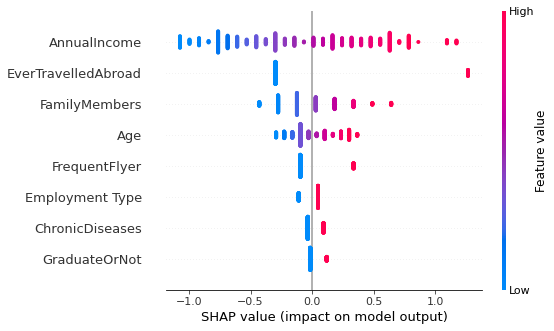

In [56]:
shap.summary_plot(shap_values, val_X, feature_names=list(train_X.columns))

### Observations from the Shap summmary
1. People who have high income,more family members, older and ever travelled abroad seem to more readily buy a travel insurance
2. People who fly less,have significantly less annual income, are younger seem to not buy a travel insurance. This makes sense because younger people usually don't earn much so they fly less and therefore might not buy Travel insurance

### Shap Analysis for a single point

In [62]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[17],feature_names=list(train_X.columns))
#shap.force_plot(explainer.expected_value, shap_values, val_X.iloc[1], feature_names=list(train_X.columns))

### Observations
- Annual Income is the most important feature for predicting the probability that a person will buy travel insurance or not
- Employer Type, GraduateOrNot and FrquentFlyer seem to push the value away from base_value
- AnnualIncome, Abroad Travel status and Age are the features which push the value towards the base value

## <b> 2. <u>Fitting a tree based model and Interpreting the coefficients</u></b>

In [63]:
my_model = DecisionTreeClassifier(random_state=42).fit(train_X, train_y)

### Feature importance of Decision Tree model

<BarContainer object of 8 artists>

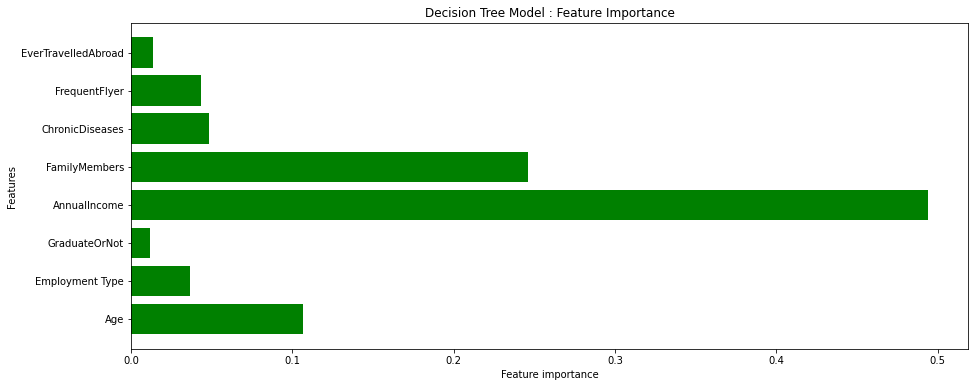

In [74]:
plt.figure(figsize=(15,6))
importances = my_model.feature_importances_
features = list(train_X.columns)
plt.title("Decision Tree Model : Feature Importance")
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.barh(features,importances,color='g')

### Observations
1. It is clear from the above plot that Annual Income is the most importanct feature for predicting the decision of buying a travel insurance
2. Features such as Family Members and Age are also some other important features

## Plotting the Decision Tree

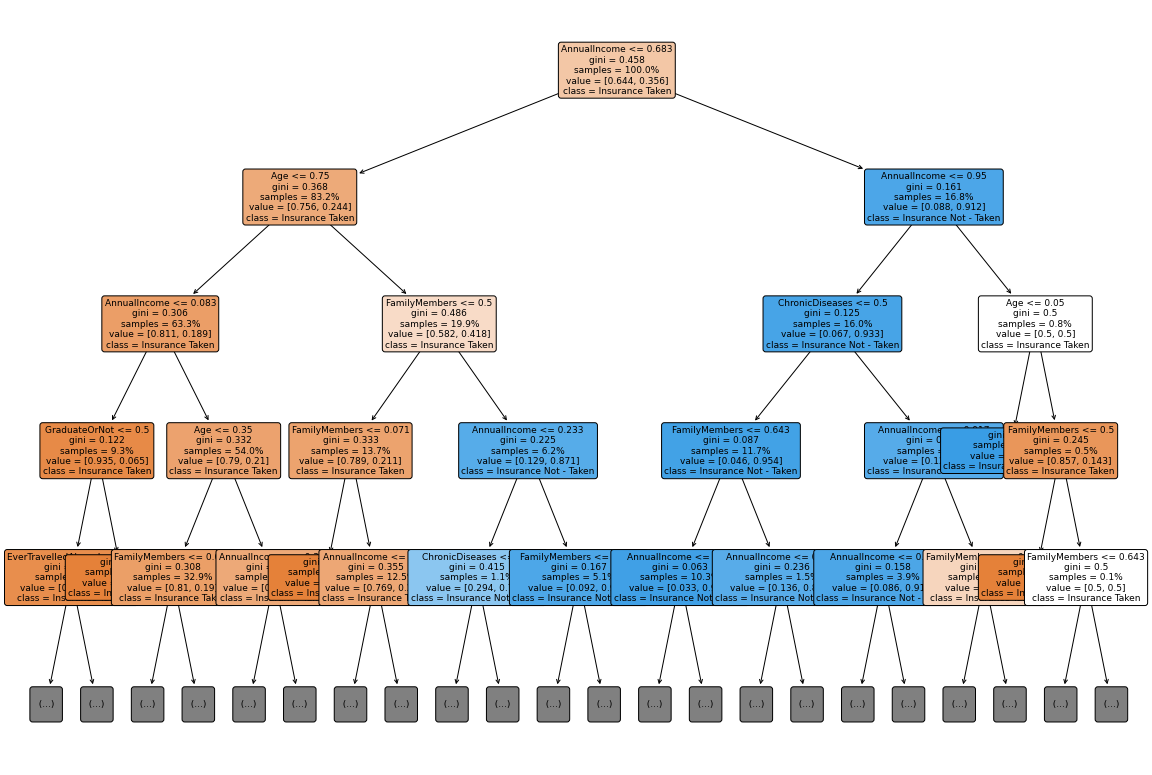

In [76]:

fig = plt.figure(figsize=(20, 14))
vis = tree.plot_tree(my_model, feature_names = features, class_names = ['Insurance Taken', 'Insurance Not - Taken'], max_depth=4, fontsize=9, proportion=True, filled=True, rounded=True)

### Observations
1. It is clear from the decision tree chart is that Annnual Income is the first node which is causing splitting of samples
2. Roughly 83% of the samples have a relatively less salary as compared to a few wealthy ones
3. Rest of the nodes in subsequest levels are important as their appearance

### Shap Analysis for a single point

In [79]:
row_to_show = 17
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [80]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction,feature_names=list(val_X.columns))

### Observations
1. In predicting the class as 0 for the 17th datapoint the features that played an important role are AnnualIncome, Age, with no ChronicDiseases,graduates and frequent flyers
2. Annual Income variable is pushing the value towards the base value

## 3. <u>Using an AutoML models and interpretability</u>

In [94]:
#defining the environment variables of h2o
import psutil
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import optparse
import time
import json
min_mem_size=6 
run_time=60
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

0
Checking whether there is an H2O instance running at http://localhost:10467 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.2.1" 2022-08-18; Java(TM) SE Runtime Environment (build 18.0.2.1+1-1); Java HotSpot(TM) 64-Bit Server VM (build 18.0.2.1+1-1, mixed mode, sharing)
  Starting server from /Users/ankitgoyal/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x6/p1fbh7qs4936fc_d9nprgjph0000gn/T/tmp7k01p1zb
  JVM stdout: /var/folders/x6/p1fbh7qs4936fc_d9nprgjph0000gn/T/tmp7k01p1zb/h2o_ankitgoyal_started_from_python.out
  JVM stderr: /var/folders/x6/p1fbh7qs4936fc_d9nprgjph0000gn/T/tmp7k01p1zb/h2o_ankitgoyal_started_from_python.err
  Server is running at http://127.0.0.1:10467
Connecting to H2O server at http://127.0.0.1:10467 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,H2O_from_python_ankitgoyal_718lgz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [95]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

In [96]:
df_h = h2o.import_file('TravelInsurancePrediction.csv')
df_h = df_h.drop(['C1'],axis=1)

df_h.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
31,Government Sector,Yes,400000,6,1,No,No,0
31,Private Sector/Self Employed,Yes,1.25e+06,7,0,No,No,0
34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
25,Private Sector/Self Employed,No,1.15e+06,4,0,No,No,0
31,Government Sector,Yes,1.3e+06,4,0,No,No,0
31,Private Sector/Self Employed,Yes,1.35e+06,3,0,Yes,Yes,1
28,Private Sector/Self Employed,Yes,1.45e+06,6,1,Yes,Yes,1
33,Government Sector,Yes,800000,3,0,Yes,No,0


In [97]:
pct_rows=0.80
df_train, df_test = df_h.split_frame([pct_rows])
print('Train dataframe size')
print(df_train.shape)
print('Test dataframe size')
print(df_test.shape)
#defining the predictor and response variable for our model
X=df_h.columns
y ='TravelInsurance'
# df_h['TravelInsurance'] = df_h['TravelInsurance'].apply(convert_binary_to_yesno) 
X.remove(y)
print('The predictor variables are as follows')
print(X)
print('The response variable is')
print(y)

Train dataframe size
(1590, 9)
Test dataframe size
(397, 9)
The predictor variables are as follows
['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
The response variable is
TravelInsurance


In [98]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=y,training_frame=df_train) 
print('Training Successful....')

AutoML progress: |
17:28:02.694: AutoML: XGBoost is not available; skipping it.
17:28:02.708: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


17:28:03.5: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


17:28:03.755: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
17:28:03.884: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before 

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

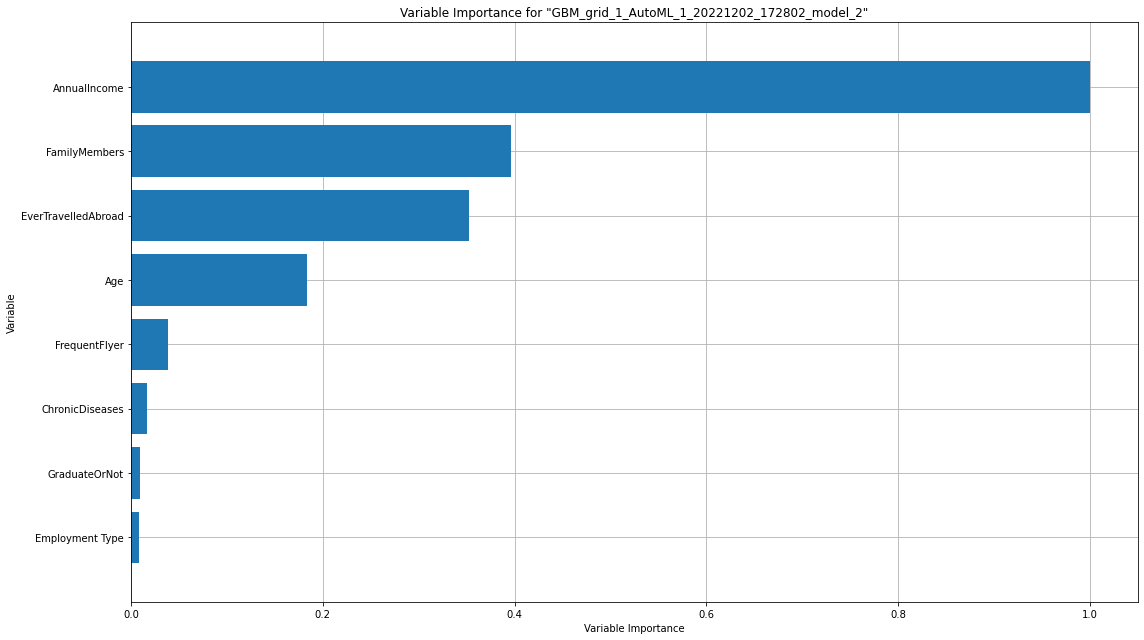

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

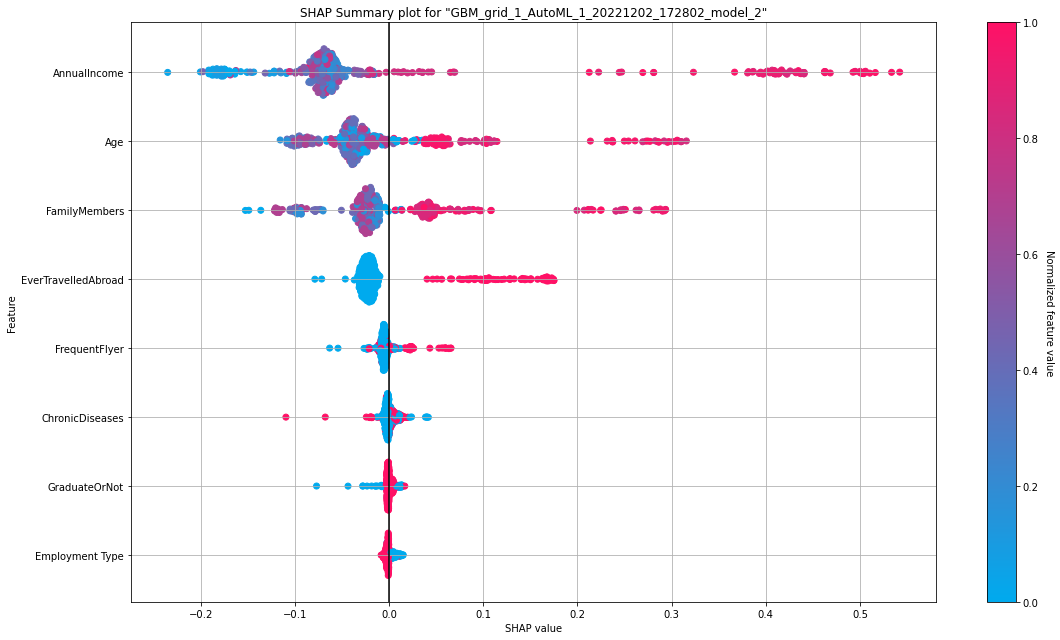

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

In [102]:
aml.explain(df_test,include_explanations=['varimp','shap_summary'])

### Observations
1. Variable Importance plot - As we have seen in earlier two models , in autoML model also we have AnnualIncome as the most importnat feature
2. Variable Importance plot - The next important features are Family Members, Age, Abroad Travel status and so on
3. SHAP Summary - In Shap summary also we can see that the features such as Annual Income, Age and FamilyMembers to be some of the most important features for predicting the travel insurance purchase decision for a person
4. After seeing shap analysis for all three of our models, we can now very clearly interpreate what features but weight in predicting our model decision which is ultimately the goal of this notebook

***
## Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

* Owner - AI Skunkworks
* Link - https://github.com/aiskunks/Skunks_Skool
<br></br>
* Author name - Prof Nik Bear Brown
* Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

* Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization
* Link - https://seaborn.pydata.org

4.The methods and parameters of the GLM model have been adapted from the h2o documentation</br>
* Author - **H2O.ai**
* Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html</br>

***
## Licensing

Copyright 2022 Ankit Goyal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.